<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/Important_Reminder_of_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests , io


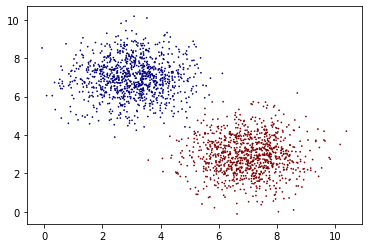

In [49]:

n_class_1 = 1000
n_class_2 = 1000

class_1_x = np.random.randn(n_class_1)*1 + 3
class_1_y = np.random.randn(n_class_1)*1 + 7
label_class_1 = [0] * n_class_1

class_2_x = np.random.randn(n_class_1)*1 + 7 
class_2_y = np.random.randn(n_class_1)*1 + 3
label_class_2 = [1] * n_class_2

y = class_1_y.tolist() + class_2_y.tolist()
x = class_1_x.tolist() + class_2_x.tolist()
label = label_class_1 + label_class_2

data = np.vstack((x,y,label)).T


plt.scatter(data[:,0],data[:,1], cmap  = 'jet', c=data[:,2], s= 0.5)

In [0]:
np.random.shuffle( data)

In [0]:
X = data[:,[0,1]]
Y = data[:,2]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [59]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

ValueError: ignored

In [44]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[265,   0],
       [  0, 235]])

In [45]:
w = model.coef_   # it will give us the slope (or the weight) of each feature
b = model.intercept_  # it is the intercept of the fitting 
'''
our model is w[0]*Flour + w[1]*Sugar + intercept = hypothesi
in depend on the function SVC uses (i.e. sigmoid or arctan , ...) 
the out put will be sigmoid(hypothesis).
NOTE that the hypothesis is the decision boundary
'''
w = w[0] # note that w is a matrix with dimansion (1 , n_features)
print(b.shape)

(1,)


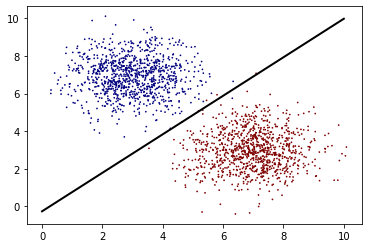

In [47]:
x = np.linspace(0,10)
y = -w[0]/w[1] * x - b/w[1]
plt.scatter(data[:,0],data[:,1], cmap  = 'jet', c=data[:,2], s = 0.5)
plt.plot(x,y,linewidth=2,color='black')


## Multivarient

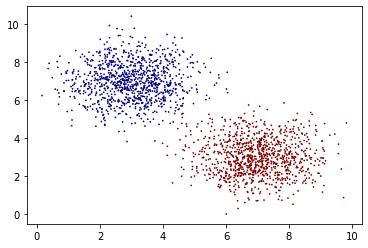

In [60]:

n_class_1 = 1000
n_class_2 = 1000

class_1_x = np.random.randn(n_class_1)*1 + 3
class_1_y = np.random.randn(n_class_1)*1 + 7
label_class_1 = [0] * n_class_1

class_2_x = np.random.randn(n_class_1)*1 + 7 
class_2_y = np.random.randn(n_class_1)*1 + 3
label_class_2 = [1] * n_class_2

y = class_1_y.tolist() + class_2_y.tolist()
x = class_1_x.tolist() + class_2_x.tolist()
label = label_class_1 + label_class_2

data = np.vstack((x,y,label)).T


plt.scatter(data[:,0],data[:,1], cmap  = 'jet', c=data[:,2], s= 0.5)

In [0]:
np.random.shuffle( data)

In [0]:
X = data[:,[0,1]]
Y = data[:,2]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [65]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred  =tree_clf.predict(x_test)

In [69]:
confusion_matrix(y_test, y_pred)

array([[243,   1],
       [  0, 256]])

#PCA

In [0]:
from sklearn.decomposition import PCA

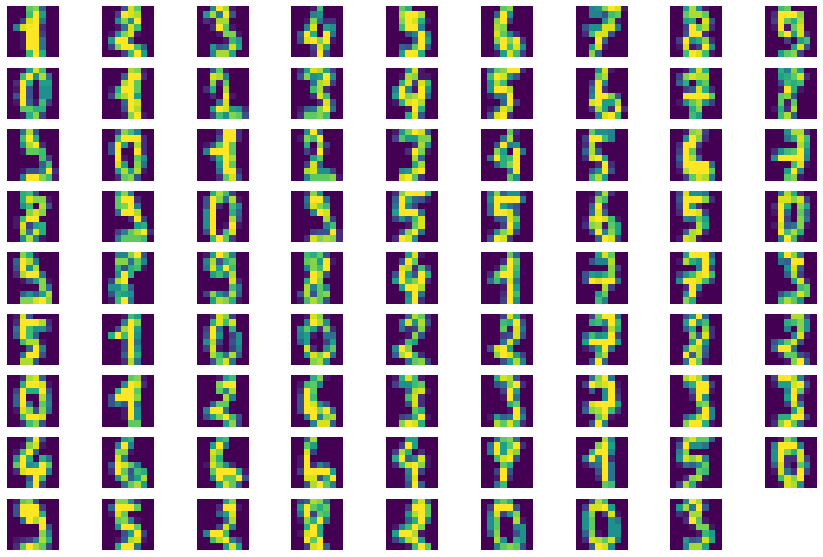

In [81]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
#axs = ['ax' + str(i) for i in range(1,401)]
axs = [i for i in range(1,81)]
fig = plt.figure(figsize=(15,10))
i=1
for ax in axs:
  ax = fig.add_subplot(9,9,i)
  ax.imshow(digits.data[i].reshape(8,8))
  ax.axis("off")
  i = i+1
  
plt.imshow(digits.data[3].reshape(8,8))

In [78]:
pca = PCA(5)
pca_digit = pca.fit_transform(digits.data)
print(digits.data.shape)
print(pca_digit.shape)

(1797, 64)
(1797, 5)


In [82]:
pca_digit.shape

(1797, 5)

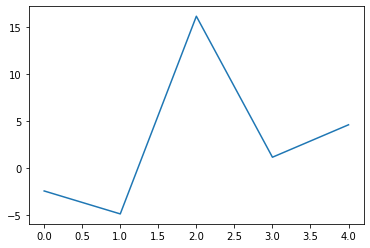

In [83]:
plt.plot(pca_digit[12,:])

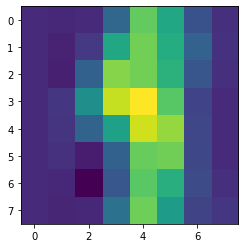

In [88]:
DIGIT = pca.inverse_transform(pca_digit)
plt.imshow(DIGIT[21].reshape((8,8)))